In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/USArrests.csv


In [2]:
from warnings import filterwarnings
filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from sklearn.cluster import KMeans
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D

from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Data Preprocessing

In [3]:
data=pd.read_csv("/kaggle/input/USArrests.csv")
df=data.copy()
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
df.index=df.iloc[:,0]

In [5]:
df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='Unnamed: 0')

In [6]:
df=df.iloc[:,1:5]

In [7]:
df.index.name=None
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [8]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


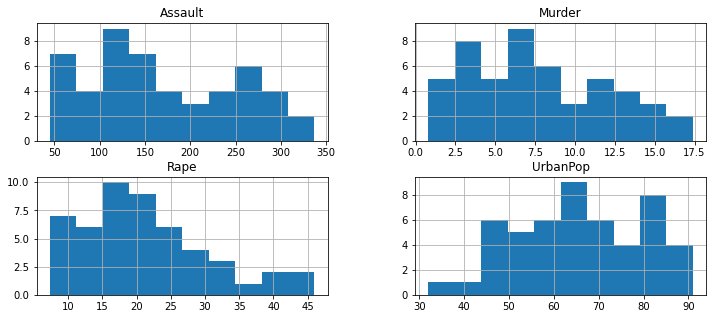

In [11]:
df.hist(figsize=(12,5));

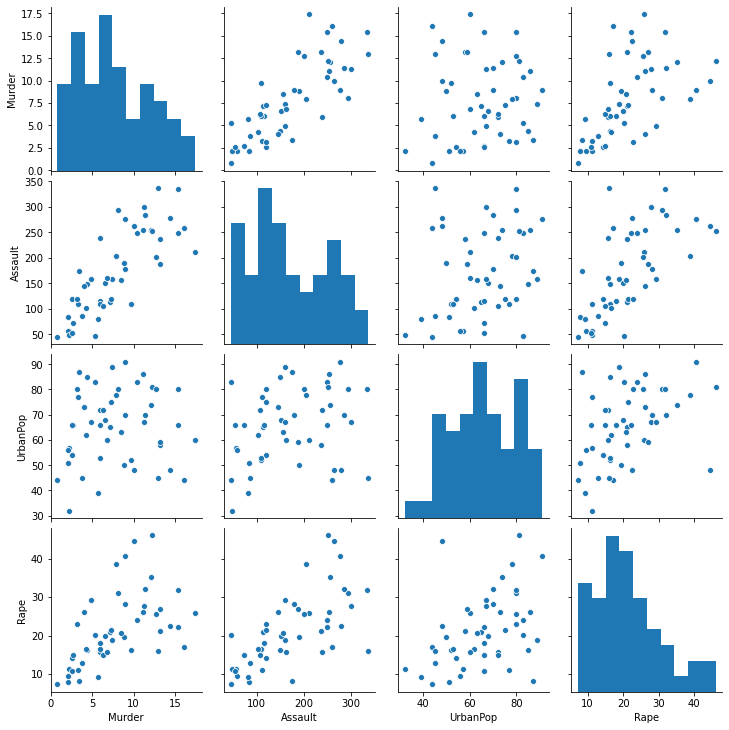

In [12]:
sns.pairplot(df);

## K-Means Clustering

### n_clusters=4

In [13]:
kmeans=KMeans(n_clusters=4)
kmeans

KMeans(n_clusters=4)

In [14]:
kmeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [15]:
k_fit=kmeans.fit(df)

In [16]:
k_fit.cluster_centers_

array([[  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ]])

In [17]:
k_fit.n_clusters

4

In [18]:
k_fit.labels_

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 3, 0, 1, 0, 3, 0, 0, 1, 3, 1, 2, 1,
       3, 1, 2, 0, 0, 1, 3, 2, 1, 1, 1, 3, 0, 2, 2, 0, 2, 1, 3, 2, 2, 0,
       3, 2, 2, 3, 3, 2], dtype=int32)

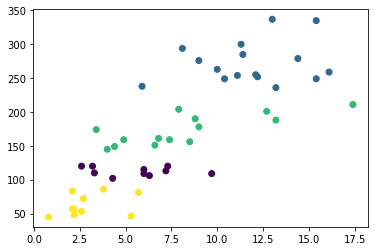

In [19]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=k_fit.labels_);

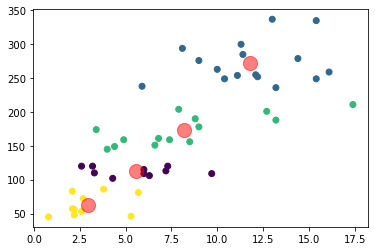

In [20]:
centers=k_fit.cluster_centers_
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=k_fit.labels_);
plt.scatter(centers[:,0],centers[:,1],c="red",s=200,alpha=0.5);

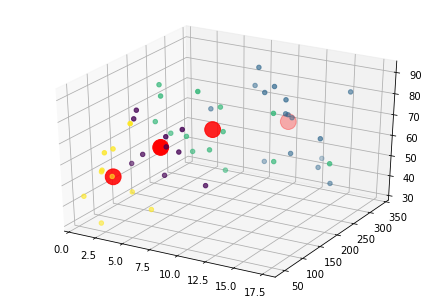

In [21]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],c=k_fit.labels_);
ax.scatter(centers[:,0],centers[:,1],centers[:,2],
           marker=".",
           c="red",
           s=1000);

### n_clusters=2

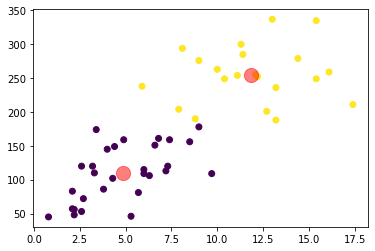

In [22]:
kmeans=KMeans(n_clusters=2)
k_fit=kmeans.fit(df)
centers=k_fit.cluster_centers_
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=k_fit.labels_);
plt.scatter(centers[:,0],centers[:,1],c="red",s=200,alpha=0.5);

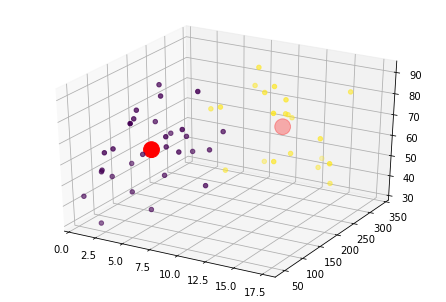

In [23]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],c=k_fit.labels_);
ax.scatter(centers[:,0],centers[:,1],centers[:,2],
           marker=".",
           c="red",
           s=1000);

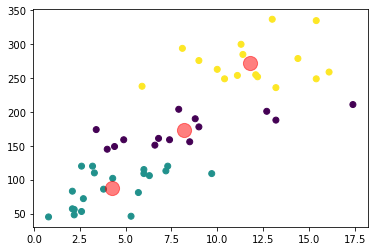

In [24]:
kmeans=KMeans(n_clusters=3)
k_fit=kmeans.fit(df)
centers=k_fit.cluster_centers_
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=k_fit.labels_);
plt.scatter(centers[:,0],centers[:,1],c="red",s=200,alpha=0.5);

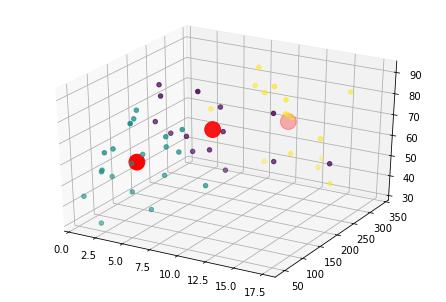

In [25]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],c=k_fit.labels_);
ax.scatter(centers[:,0],centers[:,1],centers[:,2],
           marker=".",
           c="red",
           s=1000);

In [26]:
pd.DataFrame({"States":df.index,"Clusters":k_fit.labels_})[:10]

,States,Clusters
0,Alabama,2
1,Alaska,2
2,Arizona,2
3,Arkansas,0
4,California,2
5,Colorado,0
6,Connecticut,1
7,Delaware,2
8,Florida,2
9,Georgia,0


### Optimum Cluster Number with Elbow

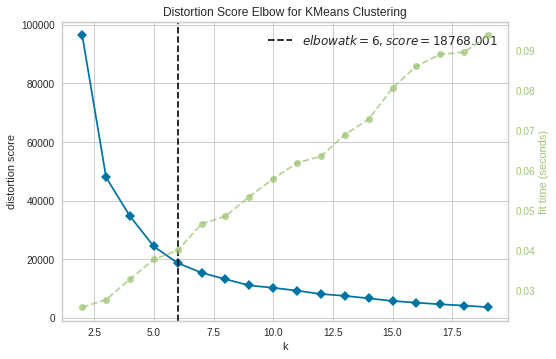

In [27]:
import yellowbrick
from yellowbrick.cluster import KElbowVisualizer

kmeans=KMeans()
visualizer=KElbowVisualizer(kmeans,k=(2,20))
visualizer.fit(df)
visualizer.poof();

In [28]:
kmeans=KMeans(n_clusters=4)
k_fit=kmeans.fit(df)
pd.DataFrame({"States":df.index,"Clusters":k_fit.labels_})[:10]

,States,Clusters
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1
5,Colorado,2
6,Connecticut,0
7,Delaware,1
8,Florida,1
9,Georgia,2


## Hierarchical Clustering 

In [29]:
hc_complete=linkage(df,"complete")
hc_avg=linkage(df,"average")
hc_single=linkage(df,"single")

In [30]:
hc_complete[:10]

array([[14.        , 28.        ,  2.29128785,  2.        ],
       [16.        , 25.        ,  3.8340579 ,  2.        ],
       [13.        , 15.        ,  3.92937654,  2.        ],
       [12.        , 31.        ,  6.23698645,  2.        ],
       [34.        , 43.        ,  6.63777071,  2.        ],
       [35.        , 45.        ,  7.35527022,  2.        ],
       [ 6.        , 37.        ,  8.0274529 ,  2.        ],
       [18.        , 40.        ,  8.53756406,  2.        ],
       [48.        , 50.        , 10.86001842,  3.        ],
       [20.        , 29.        , 11.45643924,  2.        ]])

In [31]:
hc_avg[:10]

array([[14.        , 28.        ,  2.29128785,  2.        ],
       [16.        , 25.        ,  3.8340579 ,  2.        ],
       [13.        , 15.        ,  3.92937654,  2.        ],
       [12.        , 31.        ,  6.23698645,  2.        ],
       [34.        , 43.        ,  6.63777071,  2.        ],
       [35.        , 45.        ,  7.35527022,  2.        ],
       [ 6.        , 37.        ,  8.0274529 ,  2.        ],
       [18.        , 40.        ,  8.53756406,  2.        ],
       [48.        , 50.        , 10.18421787,  3.        ],
       [49.        , 55.        , 10.73673882,  3.        ]])

In [32]:
hc_single[:10]

array([[14.        , 28.        ,  2.29128785,  2.        ],
       [16.        , 25.        ,  3.8340579 ,  2.        ],
       [13.        , 15.        ,  3.92937654,  2.        ],
       [12.        , 31.        ,  6.23698645,  2.        ],
       [34.        , 43.        ,  6.63777071,  2.        ],
       [35.        , 45.        ,  7.35527022,  2.        ],
       [49.        , 55.        ,  7.93095202,  3.        ],
       [ 6.        , 37.        ,  8.0274529 ,  2.        ],
       [18.        , 40.        ,  8.53756406,  2.        ],
       [47.        , 58.        ,  8.76698352,  3.        ]])

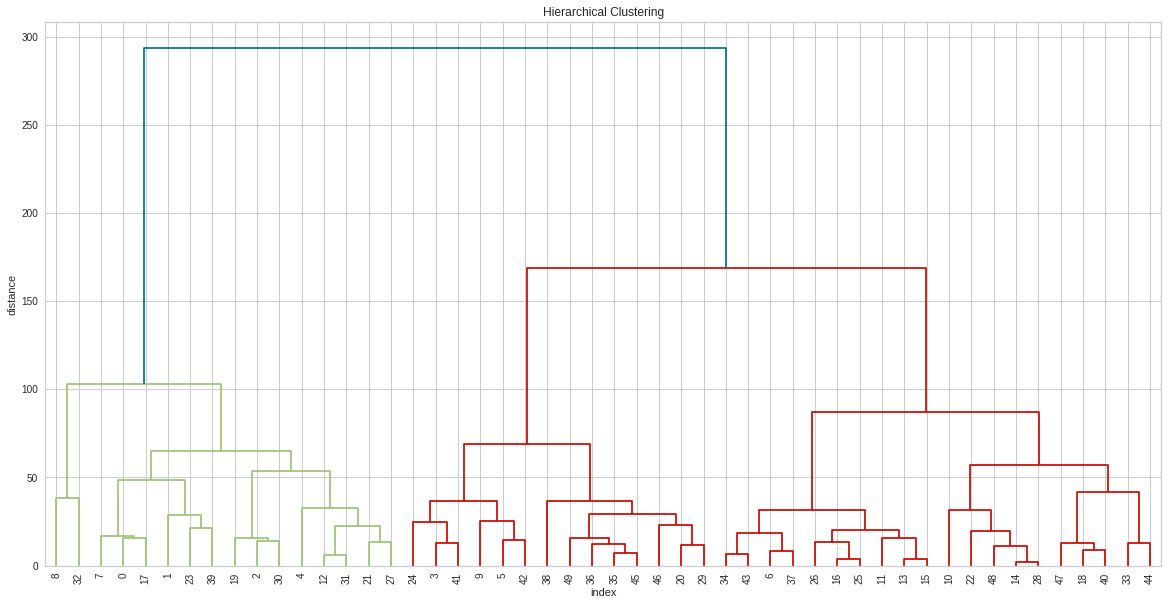

In [33]:
plt.figure(figsize=(20,10));
plt.title("Hierarchical Clustering")
plt.xlabel("index")
plt.ylabel("distance")
dendrogram(hc_complete,leaf_font_size=10);

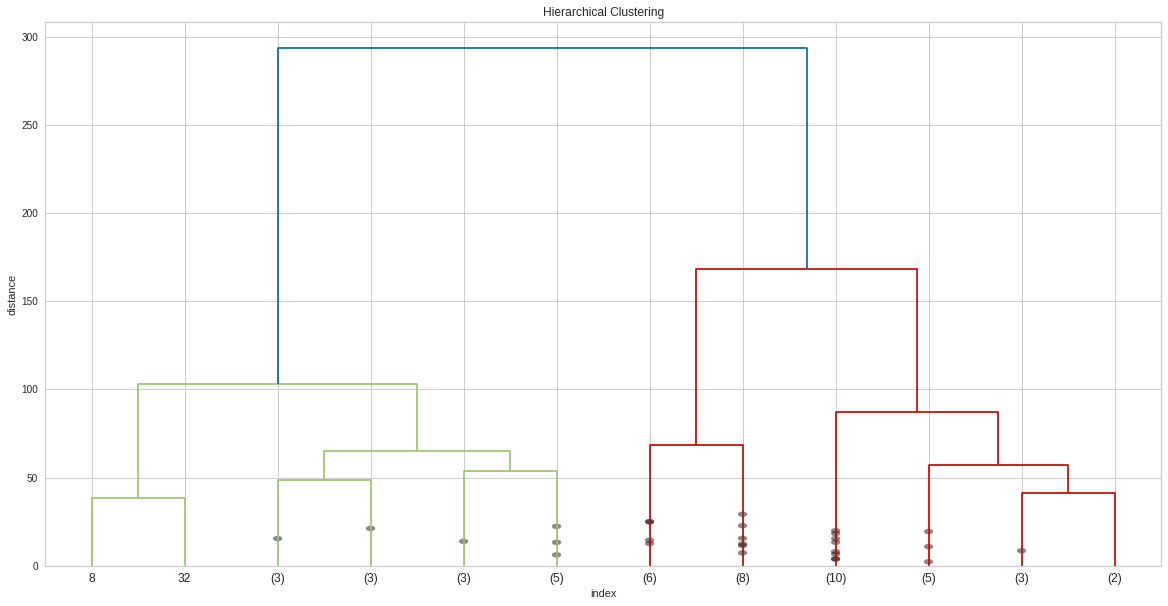

In [34]:
plt.figure(figsize=(20,10));
plt.title("Hierarchical Clustering")
plt.xlabel("index")
plt.ylabel("distance")
dendrogram(hc_complete,
          truncate_mode="lastp",
          p=12,
          show_contracted=True);

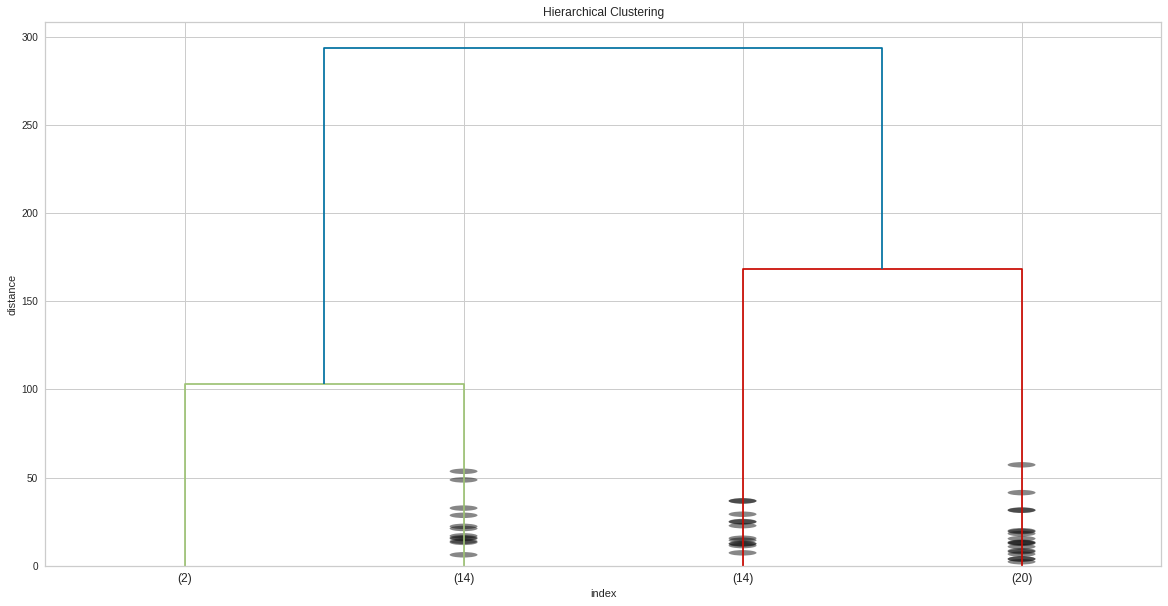

In [35]:
plt.figure(figsize=(20,10));
plt.title("Hierarchical Clustering")
plt.xlabel("index")
plt.ylabel("distance")
dendrogram(hc_complete,
          truncate_mode="lastp",
          p=4,
          show_contracted=True);

### Optimal Cluster Number

In [36]:
cluster=AgglomerativeClustering(n_clusters=4,
                               affinity="euclidean",
                               linkage="ward")

In [37]:
cluster.fit_predict(df)

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2])

In [38]:
pd.DataFrame({"States":df.index,"Clusters":cluster.fit_predict(df)})[:10]

,States,Clusters
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,3
7,Delaware,0
8,Florida,0
9,Georgia,2


## PCA

In [39]:
df=StandardScaler().fit_transform(df)

### n_component=2

In [40]:
pca=PCA(n_components=2)
pca_fit=pca.fit_transform(df)

In [41]:
pca_fit[:10]

array([[ 0.98556588,  1.13339238],
       [ 1.95013775,  1.07321326],
       [ 1.76316354, -0.74595678],
       [-0.14142029,  1.11979678],
       [ 2.52398013, -1.54293399],
       [ 1.51456286, -0.98755509],
       [-1.35864746, -1.08892789],
       [ 0.04770931, -0.32535892],
       [ 3.01304227,  0.03922851],
       [ 1.63928304,  1.2789424 ]])

In [42]:
pca_df=pd.DataFrame(pca_fit,
             columns=["comp_1","comp_2"])
pca_df.head()

,comp_1,comp_2
0,0.985566,1.133392
1,1.950138,1.073213
2,1.763164,-0.745957
3,-0.141420,1.119797
4,2.523980,-1.542934


In [43]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129])

In [44]:
pca.explained_variance_

array([2.53085875, 1.00996444])

### n_component=3

In [45]:
pca=PCA(n_components=3)
pca_fit=pca.fit_transform(df)

In [46]:
pca_fit[:5]

array([[ 0.98556588,  1.13339238, -0.44426879],
       [ 1.95013775,  1.07321326,  2.04000333],
       [ 1.76316354, -0.74595678,  0.05478082],
       [-0.14142029,  1.11979678,  0.11457369],
       [ 2.52398013, -1.54293399,  0.5985568 ]])

In [47]:
pca_df=pd.DataFrame(pca_fit,
             columns=["comp_1","comp_2","comp_3"])
pca_df.head()

,comp_1,comp_2,comp_3
0,0.985566,1.133392,-0.444269
1,1.950138,1.073213,2.040003
2,1.763164,-0.745957,0.054781
3,-0.141420,1.119797,0.114574
4,2.523980,-1.542934,0.598557


In [48]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 ])

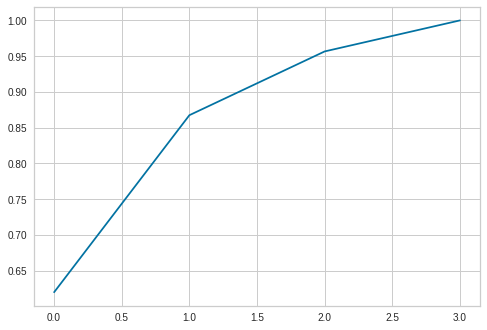

In [49]:
pca=PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_));